* **Student**: Minhchau Dang
* **Email Address**: minhchau.dang@berkeley.edu
* **Course**: 2016-0111 DATASCI W261: Machine Learning at Scale
* **Section**: Spring 2016, Section 2
* **Assignment**: Homework 0, Week 0
* **Submission Date**: Month 0, 2016

This notebook requires some nbextensions.

* [toc2](https://github.com/ipython-contrib/IPython-notebook-extensions/tree/master/nbextensions/usability/toc2) provides a button to create a floating table of contents
* [toggle_all_line_numbers](https://github.com/ipython-contrib/IPython-notebook-extensions/tree/master/nbextensions/usability/toggle_all_line_numbers) provides a button to see line numbers for all code cells
* [autosaveclasses](https://github.com/holatuwol/jupyter-magic/tree/master/nbextensions/autosaveclasses.js) avoids usage of `%%writefile` (cells with a class definition are saved to disk when run)

If they are not yet installed, run the following cell and restart the notebook server.

In [1]:
%%bash
IPYTHON_PROFILE_HOME=$(ipython locate)

nbextdl() {
    if [ ! -f $IPYTHON_PROFILE_HOME/nbextensions/$2/$3 ]; then
        mkdir -p $IPYTHON_PROFILE_HOME/nbextensions/$2
        curl --silent -L \
            "https://raw.githubusercontent.com/$1/master/nbextensions/$2/$3" \
            > "$IPYTHON_PROFILE_HOME/nbextensions/$2/$3"
    fi
}

nbextdl ipython-contrib/IPython-notebook-extensions usability/toc2 main.js
nbextdl ipython-contrib/IPython-notebook-extensions usability/toc2 main.css
nbextdl ipython-contrib/IPython-notebook-extensions usability/toc2 icon.png
nbextdl ipython-contrib/IPython-notebook-extensions usability/toc2 image.png

nbextdl ipython-contrib/IPython-notebook-extensions usability/toggle_all_line_numbers main.js
nbextdl ipython-contrib/IPython-notebook-extensions usability/toggle_all_line_numbers icon.png

nbextdl holatuwol/jupyter-magic . autosaveclasses.js

Autoload the extensions.

In [2]:
%%javascript
require(['base/js/utils'], function(utils) {
    utils.load_extensions('usability/toc2/main');
    utils.load_extensions('usability/toggle_all_line_numbers/main');
    utils.load_extensions('autosaveclasses');
});

<IPython.core.display.Javascript object>

# HW 6.0

> In mathematics, computer science, economics, or management science what is mathematical optimization?

> Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables.

> Was the project successful (deployed in the real world)? Describe.

# HW 6.1 Optimization Theory

In [4]:
%matplotlib inline

## Unconstrained univariate optimization

Let $f : \mathbb{R} \rightarrow \mathbb{R}$ in class $C^1$ and $C^2$ (its first derivative and second derivative are continuous functions). Let $\nabla f$ be the gradient function (first derivative) and let $\nabla^2 f$ be the gradient of the gradient function (second derivative).

Define the local minimum $x_0$ as a value satisfying the condition that there exists some neighborhood $\mathcal{N}$ consisting of all the points within $\epsilon > 0$ of $x_0$ for which $\forall x \in \mathcal{N}: f(x_0) < f(x)$.

> For unconstrained univariate optimization what are the first order Necessary Conditions for Optimality (FOC)? Give a mathematical definition.

If $f(x_0)$ is a local minimum of $f$, then $\nabla f(x_0) = 0$.

>  What are the second order optimality conditions (SOC)? Give a mathematical defintion.

If $f(x_0)$ is a local minimum of $f$, then $\nabla^2 f(x_0) > 0$.

> Also in python, plot the univariate function $x^3 -12x^2-6$ defined over the real domain -6 to +6. Also plot its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs.

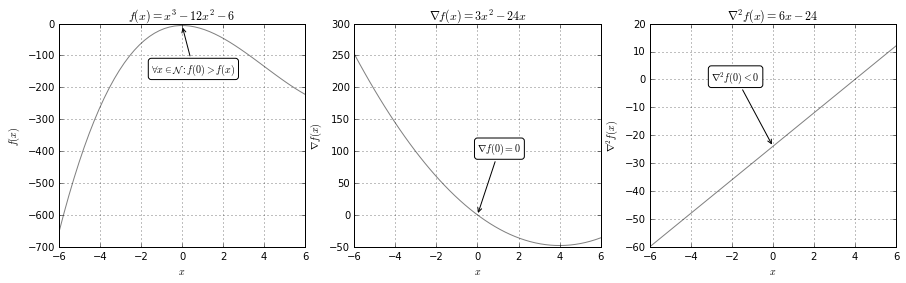

In [36]:
from matplotlib import pyplot
import numpy

"""
Utility function for plotting the line.
"""
def plot_line(subplot, x_values, y_values, function_name, function_value):
    subplot.plot(x_values, y_values, color = 'gray')

    subplot.grid(True)
    subplot.set_title('$' + function_name + ' = ' + function_value + '$')
    subplot.set_xlabel('$x$')
    subplot.set_ylabel('$' + function_name + '$')

"""
Utility function for adding a boxed annotation.
"""
def annotate_plot(subplot, point, text, position):
    subplot.annotate(
        text, xy = point, xytext = position,
        bbox = {'boxstyle': 'round', 'fc': 'white'},
        arrowprops = {'arrowstyle': '->'})

# Generate the x-values and initialize the subplots

x0 = numpy.linspace(-6, 6, 50)    
fig = pyplot.figure(figsize = (15, 4))
subplots = [fig.add_subplot(1, 3, i + 1) for i in range(3)]

# Plot the function: x^3 - 12x^2 - 6

y0 = [x**3 - 12 * x**2 - 6 for x in x0]
plot_line(subplots[0], x0, y0, 'f(x)', 'x^3 - 12x^2 - 6')
annotate_plot(subplots[0], (0, -6), '$\\forall x \in \mathcal{N} : f(0) > f(x)$', (-1.5, -150))

# Plot the gradient function: 3x^2 - 24x

y1 = [3 * x**2 - 24 * x for x in x0]
plot_line(subplots[1], x0, y1, '\\nabla f(x)', '3x^2 - 24x')
annotate_plot(subplots[1], (0, 0), '$\\nabla f(0) = 0$', (0, 100))

# Plot the gradient function: 3x^2 - 24x

y2 = [6 * x - 24 for x in x0]
plot_line(subplots[2], x0, y2, '\\nabla^2 f(x)', '6x - 24')
annotate_plot(subplots[2], (0, -24), '$\\nabla^2 f(0) < 0$', (-3, 0))

> Justify your responses using the FOC and SOC.

## Unconstrained multivariate optimization

> For unconstrained multi-variate optimization what are the first order Necessary Conditions for Optimality (FOC). Give a mathematical definition.

> What are the second order optimality conditions (SOC)? Give a mathematical definition. 

> What is the Hessian matrix in this context?

# HW 6.2

> Taking $x=1$ as the first approximation ($x_{t_1}$) of a root of $x^3 + 2x -4 = 0$, use the Newton-Raphson method to calculate the second approximation (denoted as $x_{t_2}$) of this root. (Hint: the solution is $x_{t_2} = 1.2$)

# HW 6.3 Convex Optimization

> What makes an optimization problem convex?

>  What are the first order Necessary Conditions for Optimality in convex optimization.

> What are the second order optimality conditions for convex optimization?

> Are both necessary to determine the maximum or minimum of candidate optimal solutions?

> Fill in the BLANKS here: Convex minimization, a subfield of optimization, studies the problem of minimizing BLANK functions over BLANK sets. The BLANK property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.

# HW 6.4

> The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:

> $$0.5 \sum_{i} (weight)_i \cdot (\mathbf{W} \cdot \mathbf{X}_i - y_i)^2$$

> Where training set consists of input variables $\mathbf{X}$ (in vector form) and a target variable $y$, and $\mathbf{X}$ is the vector of coefficients for the linear regression model.

> Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.

We can use the same approach as documented in the class notes for CS 229 at Stanford University ([reference](http://cs229.stanford.edu/notes/cs229-notes1.pdf)), which computes each element of the gradient vector separately.

First, if we take the partial derivative with respect to the $j$-th element of the cost vector and apply the chain rule, we have the following:

$$0.5 \sum_{i} (weight)_i \cdot ((2) (\mathbf{W} \cdot \mathbf{X}_i - y_i)) \cdot
    \frac{\partial}{\partial \mathbf{W}_j} (\mathbf{W} \cdot \mathbf{X}_i - y_i)$$

Simplifying by multiplying the (0.5) and the (2), we have the following:

$$\sum_{i} (weight)_i \cdot (\mathbf{W} \cdot \mathbf{X}_i - y_i) \cdot
    \frac{\partial}{\partial \mathbf{W}_j} (\mathbf{W} \cdot \mathbf{X}_i - y_i)$$

Observe that when we take the partial derivative of $\mathbf{W} \cdot \mathbf{X}_i - y_i)$ with respect to $\mathbf{W}_j$, most of the weights in $\mathbf{W}$ are zero. This results in us only being left with $\mathbf{X}_{ij}$, or the $j$-th element of $\mathbf{X}$ (or simply 1 for the intercept term).

This simplifies to the following:

$$\sum_{i} (weight)_i \cdot (\mathbf{W} \cdot \mathbf{X}_i - y_i) \cdot \mathbf{X}_{ij}$$

# HW 6.5

## Generate HW6.5 data

> Generate one million datapoints just like in the following notebook: 

> http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb

> Weight each example as follows: $weight(x) = abs(x^{-1})$

In [5]:
import numpy
import os

if not os.path.isfile('LinearRegression.csv'):
    size = 1000 * 1000
    x = numpy.random.uniform(-4, 4, size)
    y = x * 1.0 - 4 + numpy.random.normal(0, 0.5, size)
    weights = numpy.divide(numpy.ones(size), numpy.abs(x))

    data = zip(y, x, weights)
    numpy.savetxt('LinearRegression.csv', data, delimiter = ',')

# Confirm that we created the file

!wc -l LinearRegression.csv

1000000 LinearRegression.csv


## Create HW6.5 job

> Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent.

In [178]:
import csv
import sys

from mrjob.job import MRJob
from mrjob.protocol import RawProtocol

class WeightedOrdinaryLeastSquaresJob(MRJob):
    
    """
    Load the learning factor.
    """
    def configure_options(self):
        super(WeightedOrdinaryLeastSquaresJob, self).configure_options()

        self.add_passthrough_option(
            '--learning-factor', type = 'float', default = 0.001)
    
    """
    Load the regression model from the previous iteration and initialize the
    partial sums.
    """
    def mapper_init(self):
        self.load_model()
        self.gradient = [0.0] * len(self.coef)
    
    """
    Compute the error term and use the weighted error value to update the tally.
    """
    def mapper(self, _, line):
        row = csv.reader([line]).next()
        
        # First element is y, all middle elements are part of the vector x_i,
        # and the last element is the weight.

        y = float(row[0])
        x_i = [1.0] + [float(x) for x in row[1:-1]]
        weight = float(row[-1])
        
        # Compute the value predicted by the model by computing the dot product.
        # For now, avoid using numpy due to MRJob import issues.
  
        dot_product = sum([coef_j * x_ij for coef_j, x_ij in zip(self.coef, x_i)])
        error = dot_product - y

        # Update the gradient tally.

        for j in range(len(self.gradient)):
            self.gradient[j] += weight * error * x_i[j]

    """
    Yield the computed tally.
    """
    def mapper_final(self):
        for j in range(len(self.gradient)):
            yield j, self.gradient[j]

    """
    Load the regression model from the previous iteration.
    """
    def reducer_init(self):
        self.load_model()
    
    """
    Yield the new coefficients by subtracting the gradient change from the
    original coefficient.
    """
    def reducer(self, j, gradients):        
        total_gradient = sum(gradients)
        adjusted_gradient = self.options.learning_factor * total_gradient

        new_coef = self.coef[j] - adjusted_gradient
        yield j, new_coef

    """
    Load the regression model from the previous iteration.
    """
    def load_model(self):

        # The model is not guaranteed to be in order since it can be emitted
        # by multiple reducers, so pad the array if we get an index that is
        # too far into the array.
        
        self.coef = []
        
        with open('model.txt', 'r') as model_file:
            for key, value in csv.reader(model_file):
                index = int(key)
                
                for i in range(len(self.coef), index + 1):
                    self.coef.append(0.0)
            
                self.coef[index] = float(value)

if __name__ == '__main__' and sys.argv[0].find('ipykernel') == -1:
    WeightedOrdinaryLeastSquaresJob().run()

## Create a generic driver

In [48]:
import numpy
import os
import shutil
import time

class ConvergingModelDriver:

    """
    Stores the given model to a file.
    """
    def store_model(self, file_name, model):
        with open(file_name, 'w') as model_file:
            for key, point in model.iteritems():
                print >> model_file, str(key) + ',' + ','.join([str(x) for x in point])

    """
    Iterates until the threshold for convergence has been satisfied.
    """
    def run(self, runner_type, input_file, output_folder, threshold):

        # Create the output directory locally.
        
        if os.path.isdir(output_folder):
            shutil.rmtree(output_folder)
        
        os.mkdir(output_folder)
        
        # Initialize the model.

        pre_model = None
        post_model = self.get_initial_model()

        # Iterate until we have converged.

        converged = False
        iteration = 0

        self.log_iteration(0, post_model, None)
        
        time_start = time.time()
        base_args = ['-r', runner_type, '--strict-protocols', '--file=model.txt', input_file]
        
        while not converged:
            iteration += 1
            pre_model = post_model

            # Write the model.txt file for the next iteration.

            iteration_file_name = '%s/%04d.txt' % (output_folder, iteration)

            self.store_model(iteration_file_name, post_model)
            shutil.copyfile(iteration_file_name, 'model.txt')

            # Run the next iteration.

            iteration_output_folder = '%s/%04d' % (output_folder, iteration)

            iteration_args = ['--output-dir=' + iteration_output_folder]
            
            mr_job = self.get_job(base_args + iteration_args)

            with mr_job.make_runner() as runner:
                runner.run()

                # Retrieve the model from the streaming output.
                
                post_model = {}

                for line in runner.stream_output():
                    key, point = mr_job.parse_output_line(line)
                    
                    if isinstance(point, float):
                        point = [point]
                        
                    post_model[key] = point

                # Account for when some class no longer gets emitted

                for key, point in pre_model.iteritems():
                    if key not in post_model:
                        post_model[key] = point

            # Log iteration results and check for convergence.

            maximum_change = self.get_maximum_change(pre_model, post_model)
            self.log_iteration(iteration, post_model, maximum_change)
            converged = maximum_change <= threshold

        time_end = time.time()
        duration = time_end - time_start

        print 'Converged in', iteration, 'iteration(s), which required', duration, 'second(s)'

    """
    Returns the maximum change for any feature in the model.
    """
    def get_maximum_change(self, pre_model, post_model):
        best_point_difference = 0

        for key, pre_point in pre_model.iteritems():
            post_point = post_model[key]

            point_difference = numpy.array(pre_point) - numpy.array(post_point)
            max_point_difference = max(numpy.abs(point_difference))

            if max_point_difference > best_point_difference:
                best_point_difference = max_point_difference

        return best_point_difference

## Create HW6.5 driver

In [185]:
import sys
import numpy

from ConvergingModelDriver import ConvergingModelDriver
from WeightedOrdinaryLeastSquaresJob import WeightedOrdinaryLeastSquaresJob

class WeightedOrdinaryLeastSquaresDriver(ConvergingModelDriver):

    """
    For reproducibility, we'll start at (0,0)
    """
    def get_initial_model(self):
        return {
            0: [0.0],
            1: [0.0]
        }

    """
    Return a job with a maximum weight set to 1000 and a learning rate set
    to 2 * 10^-7
    """
    def get_job(self, iteration_args):
        learning_factor = 1.0 / (1000.0 * 1000.0 * 20)
        
        extra_args = [
            '--learning-factor=' + str(learning_factor)
        ]
        
        jobs_args = iteration_args + extra_args
        return WeightedOrdinaryLeastSquaresJob(args = jobs_args)

    """
    Logs the model.
    """
    def log_iteration(self, iteration, model, maximum_change):
        print '%04d\t%f\t%f' % (iteration, model[0][0], model[1][0])

if __name__ == '__main__' and sys.argv[0].find('ipykernel') == -1:
    driver = WeightedOrdinaryLeastSquaresDriver()
    driver.run(sys.argv[1], sys.argv[2], sys.argv[3], float(sys.argv[4]))

## Run HW6.5 job

In [186]:
!python WeightedOrdinaryLeastSquaresDriver.py local LinearRegression.csv mrjob_65_output 0.001

0000	0.000000	0.000000
No handlers could be found for logger "mrjob.local"
0001	-1.187683	0.100324
0002	-2.014406	0.190528
0003	-2.589871	0.271652
0004	-2.990438	0.344620
0005	-3.269263	0.410261
0006	-3.463344	0.469316
0007	-3.598437	0.522450
0008	-3.692470	0.570259
0009	-3.757922	0.613279
0010	-3.803479	0.651992
0011	-3.835188	0.686828
0012	-3.857257	0.718177
0013	-3.872618	0.746389
0014	-3.883308	0.771778
0015	-3.890747	0.794626
0016	-3.895924	0.815188
0017	-3.899526	0.833693
0018	-3.902032	0.850346
0019	-3.903776	0.865334
0020	-3.904988	0.878822
0021	-3.905831	0.890960
0022	-3.906417	0.901885
0023	-3.906824	0.911716
0024	-3.907107	0.920564
0025	-3.907303	0.928527
0026	-3.907439	0.935693
0027	-3.907533	0.942143
0028	-3.907598	0.947947
0029	-3.907643	0.953170
0030	-3.907674	0.957871
0031	-3.907695	0.962102
0032	-3.907710	0.965910
0033	-3.907720	0.969336
0034	-3.907726	0.972420
0035	-3.907730	0.975196
0036	-3.907733	0.977694
0037	-3.907735	0.979941
0038	-3.907736	0.981964
0039	-3.90773

# HW 6.5a

> Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

## Create a job to sample data

In [41]:
import random
import sys

from mrjob.job import MRJob
from mrjob.protocol import RawValueProtocol

class RandomSampleJob(MRJob):
    
    OUTPUT_PROTOCOL = RawValueProtocol

    """
    Load the sampling factor.
    """
    def configure_options(self):
        super(RandomSampleJob, self).configure_options()

        self.add_passthrough_option(
            '--sampling-factor', type = 'float', default = 0.01)

    """
    Yield the line with the sampling probability.
    """
    def mapper(self, _, line):
        if random.random() <= self.options.sampling_factor:
            yield None, line

if __name__ == '__main__' and sys.argv[0].find('ipykernel') == -1:
    RandomSampleJob().run()

## Run the sampling job

In [42]:
!rm -rf mrjob_65a_output
!python RandomSampleJob.py -r local \
    --strict-protocols \
    --sampling-factor=0.01 \
    --output-dir=mrjob_65a_output \
    LinearRegression.csv \
    --no-output \
    > /dev/null 2>&1

In [43]:
!cat mrjob_65a_output/* > LinearRegression.sample.csv
!wc -l LinearRegression.sample.csv

9953 LinearRegression.sample.csv


## Check HW6.5 against scikit-learn

## Plot 6.5 model

> Plot the resulting weighted linear regression model versus the original model that you used to generate the data.

> Comment on your findings.

# HW 6.5.1 (Optional)

> Using MRJob and in Python, plot the error surface for the weighted linear regression model using a heatmap and contour plot. Also plot the current model in the original domain space.  (Plot them side by side if possible)

> Plot the path to convergence (during training) for the weighted linear regression model in plot error space and in the original domain space. Make sure to label your plots with iteration numbers, function, model space versus original domain space, etc.

> Comment on convergence and on the mean squared error using your weighted OLS algorithm on the weighted dataset versus using the weighted OLS algorithm on the uniformly weighted dataset.

# HW 6.6 Clean up notebook for GMM via EM

> Using the following notebook as a starting point:

> http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/0t7985e40fovlkw/EM-GMM-MapReduce%20Design%201.ipynb 

> Improve this notebook as follows:
> - Add in equations into the notebook (not images of equations) 
> - Number the equations
> - Make sure the equation notation matches the code and the code and comments refer to the equations numbers
> - Comment the code
> - Rename/Reorganize the code to make it more readable
> - Rerun the examples similar graphics (or possibly better graphics)

# HW 6.7 Implement Bernoulli Mixture Model via EM

## Create HW6.7 job

> Implement the EM clustering algorithm to determine Bernoulli Mixture Model for discrete data in MRJob.

In [128]:
import csv
import math
import sys

from mrjob.job import MRJob

class BernoulliMixtureModelJob(MRJob):

    """
    Load the smoothing factor.
    """
    def configure_options(self):
        super(BernoulliMixtureModelJob, self).configure_options()

        self.add_passthrough_option(
            '--smoothing-factor', type = 'float', default = 0.0001)
    
    """
    Load the Bernoulli Mixture Model from the previous iteration and initialize
    the class counts (for the priors) and the weighted feature tallies.
    """
    def mapper_init(self):
        self.load_model()

        self.total_examples = 0
        self.class_examples = []
        self.weighted_true = []
        self.weighted_false = []
        
        # There is a strange pass by reference issue in initializing 2D arrays
        # using the multiplication operator, so iterate and append 1D arrays.
        
        for i in range(self.class_count):
            self.class_examples.append(0)
            self.weighted_true.append([0.0] * self.feature_count)
            self.weighted_false.append([0.0] * self.feature_count)
        
    """
    Compute the probability for each class and update our internal tallies of
    how many true/false values on each feature for each class.
    """
    def mapper(self, _, line):
        features = [bool(int(x)) for x in csv.reader([line]).next()]
        
        # First, compute the log likelihood that the feature is in any given
        # feature class.
        
        log_likelihoods = []
        
        for class_prior, likelihoods in zip(self.class_priors, self.likelihoods):
            if class_prior == 0.0:
                log_likelihoods.append(float('-inf'))
                continue
            
            log_likelihood = math.log(class_prior)
        
            for feature, likelihood in zip(features, likelihoods):
                if feature:
                    log_likelihood += math.log(likelihood)
                else:
                    log_likelihood += math.log(1 - likelihood)
            
            log_likelihoods.append(log_likelihood)
        
        # Identify the maximum probability value and update the class example
        # count for the corresponding class.
        
        max_log_likelihood = max(log_likelihoods)
        class_id = log_likelihoods.index(max_log_likelihood)

        self.total_examples += 1
        self.class_examples[class_id] += 1
        
        # Shift the log likelihoods to avoid getting an underflow when we
        # convert them to exponents. Note that everything is negative, so you
        # will want to subtract.
        
        shifted_log_likelihoods = [x - max_log_likelihood for x in log_likelihoods]
        
        # Identify the numerators by exponentiating all the values. Compute
        # the denominator by adding the numerators together.
        
        numerators = [math.exp(x) for x in shifted_log_likelihoods]
        denominator = sum(numerators)
        
        # Compute the class probabilities so that we can tally the weighted
        # feature occurrencies.

        for i in range(self.class_count):
            class_probability = numerators[i] / denominator
            
            for j in range(self.feature_count):
                if features[j]:
                    self.weighted_true[i][j] += class_probability
                else:
                    self.weighted_false[i][j] += class_probability

    """
    Emit the weighted probabilities.
    """
    def mapper_final(self):
        for i in range(self.class_count):
            class_id = self.class_ids[i]
            
            class_summary = {
                'class_examples': self.class_examples[i],
                'total_examples': self.total_examples,
                'weighted_true': self.weighted_true[i],
                'weighted_false': self.weighted_false[i]
            }

            yield class_id, class_summary

    """
    Load the Bernoulli Mixture Model from the previous iteration.
    """
    def reducer_init(self):
        self.load_model()

    """
    Combine the summaries for each class in order to compute the new priors and
    conditional probabilities / likelihoods.
    """
    def reducer(self, class_id, class_summaries):
        class_examples = 0
        total_examples = 0
        total_weighted_true = [0.0] * self.feature_count
        total_weighted_false = [0.0] * self.feature_count
        
        # Combine the counts and weighted counts.
        
        for class_summary in class_summaries:
            class_examples += class_summary['class_examples']
            total_examples += class_summary['total_examples']
            
            for i in range(self.feature_count):
                total_weighted_true[i] += class_summary['weighted_true'][i]
                total_weighted_false[i] += class_summary['weighted_false'][i]
        
        # Compute the priors and likelihoods
        
        class_prior = float(class_examples) / total_examples
        likelihoods = []
        
        for weighted_true, weighted_false in zip(total_weighted_true, total_weighted_false):
            weighted_true = weighted_true + self.options.smoothing_factor
            weighted_total = (weighted_true + weighted_false) + (self.options.smoothing_factor * self.class_count)
            
            likelihood = weighted_true / weighted_total
            likelihoods.append(likelihood)

        # Yield the priors concatenated to the likelihoods as the model for this class
            
        yield class_id, [class_prior] + likelihoods
        
    """
    Load the Bernoulli Mixture Model from the previous iteration.
    """
    def load_model(self):
        self.class_ids = []
        self.class_priors = []
        self.likelihoods = []
        
        # Initialize the class IDs, the priors, and the per-class likelihoods.
        
        with open('model.txt', 'r') as model_file:
            for row in csv.reader(model_file):
                class_id = row[0]
                class_prior = float(row[1])
                likelihoods = [float(x) for x in row[2:]]
                
                self.class_ids.append(class_id)
                self.class_priors.append(class_prior)
                self.likelihoods.append(likelihoods)
        
        # For convenience
        
        self.class_count = len(self.class_ids)
        self.feature_count = len(self.likelihoods[0])

if __name__ == '__main__' and sys.argv[0].find('ipykernel') == -1:
    BernoulliMixtureModelJob().run()

## Create HW6.7 driver

In [96]:
import sys
import numpy

from ConvergingModelDriver import ConvergingModelDriver
from BernoulliMixtureModelJob import BernoulliMixtureModelJob

class BernoulliMixtureModelDriver(ConvergingModelDriver):

    """
    For reproducibility, we'll start at everything evenly spaced at values
    that are not too extreme (between 1/4 and 3/4)
    """
    def get_initial_model(self):
        
        initial_model = {}
        
        class_ids = ['ClusterA', 'ClusterB', 'ClusterC', 'ClusterD']
        priors = [1.0 / len(class_ids)] * len(class_ids)
        
        for class_id, prior in zip(class_ids, priors):
            initial_model[class_id] = [prior]
            initial_model[class_id].extend(numpy.random.random(1000))
        
        return initial_model        

    """
    Return the job with a smoothing factor argument.
    """
    def get_job(self, iteration_args):
        smoothing_factor = 0.0001
        
        extra_args = ['--smoothing-factor=' + str(smoothing_factor)]
        job_args = iteration_args + extra_args
        
        return BernoulliMixtureModelJob(args = job_args)

    """
    Logs the model.
    """
    def log_iteration(self, iteration, model, maximum_change):
        class_priors = [
            model[class_id][0] for class_id in ['ClusterA', 'ClusterB', 'ClusterC', 'ClusterD']
        ]

        print '%04d\t%f\t%f\t%f\t%f' % (
            iteration, model['ClusterA'][0], model['ClusterB'][0], model['ClusterC'][0],
            model['ClusterD'][0]
        )

if __name__ == '__main__' and sys.argv[0].find('ipykernel') == -1:
    driver = BernoulliMixtureModelDriver()
    driver.run(sys.argv[1], sys.argv[2], sys.argv[3], float(sys.argv[4]))

## Download HW4.5 data

> As a test: use the same dataset from HW 4.5, the Tweet Dataset. 
Using this data, you will implement a 1000-dimensional EM-based Bernoulli Mixture Model  algorithm in MrJob on the users by their 1000-dimensional word stripes/vectors using K = 4.

In [69]:
import os

if not os.path.isfile('topUsers_features.txt'):
    !wget --quiet https://www.dropbox.com/sh/5bex8l871t0bg3a/AAChDHmBbudx6E807bx5f_m0a/topUsers_Apr-Jul_2014_1000-words.txt
    !cut -d',' -f 4- topUsers_Apr-Jul_2014_1000-words.txt > topUsers_features.txt

## Run HW6.7 job

In [126]:
!python BernoulliMixtureModelDriver.py local topUsers_features.txt mrjob_65_output 0.001

0000	0.250000	0.250000	0.250000	0.250000
No handlers could be found for logger "mrjob.local"
0001	0.692000	0.135000	0.151000	0.022000
0002	0.713000	0.165000	0.048000	0.074000
0003	0.700000	0.182000	0.043000	0.075000
0004	0.693000	0.190000	0.042000	0.075000
0005	0.688000	0.195000	0.042000	0.075000
0006	0.685000	0.198000	0.042000	0.075000
0007	0.682000	0.201000	0.042000	0.075000
0008	0.682000	0.201000	0.042000	0.075000
0009	0.681000	0.202000	0.042000	0.075000
0010	0.681000	0.202000	0.042000	0.075000
Converged in 10 iteration(s), which required 33.4158351421 second(s)


Let's compare this to the original class probabilities.

In [127]:
!cut -d',' -f 2 topUsers_Apr-Jul_2014_1000-words.txt | sort | uniq -c

    752 0
     91 1
     54 2
    103 3


## Run HW4.5 job

> Repeat this experiment using your KMeans MRJob implementation fron HW4.

## Report HW6.7 results

> Report the rand index score using the class code as ground truth label for both algorithms and comment on your findings.